***1. For this project check-in your team must demonstrate at least one unsupervised learning method: PCA
or clustering. You may even combine them.***

We will use clustering in this check in

***2. If you apply clustering, include code. quantitative metrics to evaluate clustering, and how you determined
the number of clusters for your data and why. Explain how clustering helped you learn about
the structure of data for your project.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings

df = pd.read_csv("/content/Cleaned_StudentPerformanceFactors.csv")

X = df.drop(columns=["Exam_Score"])

num_cols = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores",
    "Tutoring_Sessions",
    "Physical_Activity"
]

X_num = X[num_cols].copy()
X_num.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


In [ ]:
#since it depend on distance first standarize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

k_values = range(2, 9)
inertias = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_scaled, labels)

    inertias.append(inertia)
    sil_scores.append(sil)
    print(f"k = {k:2d} | inertia = {inertia:.1f} | silhouette = {sil:.3f}")


k =  2 | inertia = 33456.5 | silhouette = 0.128
k =  3 | inertia = 30410.6 | silhouette = 0.122
k =  4 | inertia = 27968.0 | silhouette = 0.119
k =  5 | inertia = 26086.5 | silhouette = 0.122
k =  6 | inertia = 24602.4 | silhouette = 0.119
k =  7 | inertia = 23263.3 | silhouette = 0.122
k =  8 | inertia = 22389.9 | silhouette = 0.118


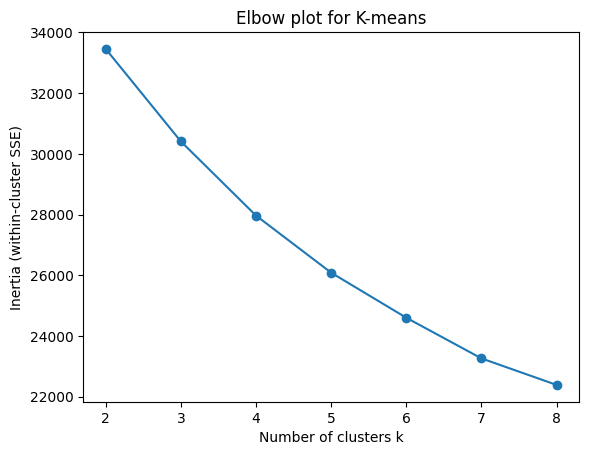

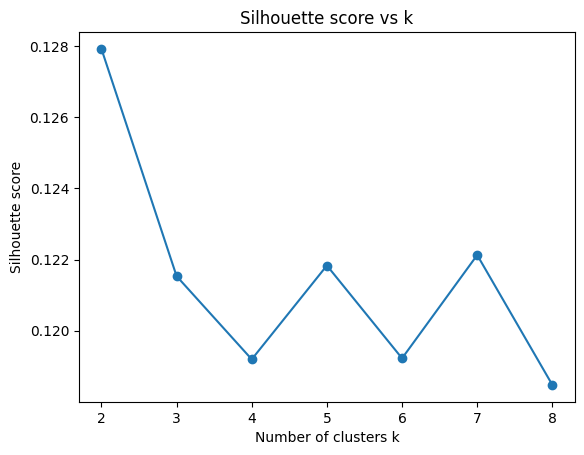

In [ ]:

# Elbow plot
plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow plot for K-means")
plt.show()

# Silhouette plot
plt.figure()
plt.plot(k_values, sil_scores, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k")
plt.show()


In [ ]:
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df["Cluster"] = cluster_labels
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,2


In [ ]:
cluster_summary_num = df.groupby("Cluster")[num_cols].mean().round(2)
print(cluster_summary_num)


         Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Cluster                                                            
0                20.18       69.60         7.12            76.50   
1                20.20       90.52         7.01            75.11   
2                19.31       80.34         6.94            72.71   

         Tutoring_Sessions  Physical_Activity  
Cluster                                        
0                     0.96               3.00  
1                     0.99               2.78  
2                     3.14               3.24  


In [ ]:
threshold = df["Exam_Score"].median()
df["High_Exam"] = (df["Exam_Score"] >= threshold).astype(int)

pd.crosstab(df["Cluster"], df["High_Exam"], normalize="index").round(2)

High_Exam,0,1
Cluster,,
0,0.72,0.28
1,0.19,0.81
2,0.35,0.65


**Determining the Number of Clusters (k):**

To find the optimal number of clusters (`k`), two common methods were used:

1.  **Elbow Method (Inertia):** KMeans was run for `k` values ranging from 2 to 8. The inertia (sum of squared distances of samples to their closest cluster center) was calculated for each `k`. The plot in labeled "Elbow plot for K-means" shows how inertia decreases as `k` increases. The 'elbow' point, where the rate of decrease significantly slows down, suggests an optimal `k`. In this case, `k=3` or `k=4` could be considered a potential elbow.

2.  **Silhouette Score:** The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. As shown in the plot labeled "Silhouette score vs k", the silhouette scores were generally low, but `k=3` and `k=5` showed slightly higher values. Considering both the elbow method and the silhouette scores, `k=3` was chosen as the `best_k` because it represented a reasonable trade-off between minimizing inertia and achieving a relatively good silhouette score, while also aiming for interpretability with fewer clusters.

**How Clustering Helped Learn About Data Structure:**

After applying K-Means with `k=3` and assigning cluster labels to the dataset in, the following insights were gained by analyzing the characteristics of each cluster:

*   **Cluster Summary for Numerical Features:**  The code cell above provides the mean values for numerical features within each cluster. This table reveals distinct patterns:
    *   **Cluster 0:** Students in this cluster have lower attendance, and lower tutoring sessions. They have slightly higher `Previous_Scores` and `Sleep_Hours` but lower `Tutoring_Sessions` and moderate `Physical_Activity`.
    *   **Cluster 1:** This cluster shows students with very high attendance and moderate `Previous_Scores`. They also have low `Tutoring_Sessions` and relatively lower `Physical_Activity`.
    *   **Cluster 2:** This cluster is characterized by the highest average `Tutoring_Sessions` and `Physical_Activity`, with moderate `Attendance`, and slightly lower `Hours_Studied` and `Previous_Scores`.

*   **Correlation with Exam Performance:** https://colab.research.google.com/drive/1y7U0l0W9UOIisARJ86BYxBxTUaInHvQ7#scrollTo=Xde6c-7bqpdj&line=1&uniqifier=1 shows the distribution of students achieving `High_Exam` scores (above the median) within each cluster. This is crucial for understanding how these student groups relate to academic success:
    *   **Cluster 0:** Has the lowest proportion of high exam scores (28%). This cluster, with lower attendance and tutoring sessions, might represent students who struggle academically.
    *   **Cluster 1:** Has the highest proportion of high exam scores (81%). This cluster, with high attendance and moderate previous scores, seems to be a high-achieving group.
    *   **Cluster 2:** Has a good proportion of high exam scores (65%). This cluster, with high tutoring sessions and physical activity, might represent students who actively seek support and maintain a balanced lifestyle, leading to good performance.

In summary, clustering helped to segment the student population into three distinct groups based on their study habits and other numerical factors. This segmentation revealed different profiles that correlate with varying levels of exam performance, providing valuable insights into the underlying structure of the data.